In [80]:
%matplotlib inline
#load modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from astropy import units as u
from astropy.io import fits
from  matplotlib.colors import LogNorm
import scipy.ndimage

# MagAO-X function definitions
import magaoxFunctions as mf
# draw the dark hole regions
from skimage.draw import draw

# PSD code
from scipy import signal
import h5py
import copy
import PSD_defns as psd

In [83]:
print('We are still active!')

We are still active!


In [81]:
# open the optic surface
surf_loc = 'zygo_data/flat_mirrors/coastline_flat_correct.fits'
surf_data = fits.getdata(surf_loc)*u.um

# calculate the power optic data
(pwr_opt, npix_diam, ap_var) = psd.calc_surfPower(surf_data, D_full_cf, ca_80, oversamp_size)

ap_var

<Quantity 8.8907926e-12 um2>

In [82]:
var_1

[9.168656034627703e-12,
 9.52341772332496e-12,
 1.1960056706198839e-11,
 6.522443002791295e-12,
 7.268902132709689e-12,
 1.0429042957816849e-11,
 4.980177257195722e-12,
 9.20768790562536e-12]

In [4]:
# Test with the coastline flat
ntot_cf = 1 # goes from 1-8
D_full_cf = 50*u.mm
ca_80 = 80
oversamp_size = 4096
dr_width = 5
npix_diam_cf = []
var_cf = []

# open the optic surface
surf_loc = 'zygo_data/flat_mirrors/coastline_flat_correct.fits'
surf_data = fits.getdata(surf_loc)*u.um

# calculate the power optic data
(pwr_opt, npix_diam, ap_var) = psd.calc_surfPower(surf_data, D_full_cf, ca_80, oversamp_size)

# calculate the spatial frequency content
(delta_k, FT_freq) = psd.calc_spatialFreq(oversamp_size, npix_diam, ca_80, D_full_cf)

norm_psd = psd.calc_normPSD(pwr_opt, delta_k)
np.sum(norm_psd) * (delta_k**2)

# calculate the PSD data from the variance-normalized PSD
(kval, mean_val) = psd.calc_radialPSD(norm_psd, FT_freq, dr_width)

print('Finished calculating PSD for surface {}'.format(ntest))
# if this is the first loop, initialize variables.
# There's gotta be a smarter way to do this.
if ntest == 0:
    kval_cf = np.zeros((ntot_cf, np.shape(kval)[0]))
    mean_psd_cf = np.zeros((ntot_cf, np.shape(mean_val)[0]))

kval_cf[ntest,:] = copy.copy(kval)
mean_psd_cf[ntest,:] = copy.copy(mean_val)
npix_diam_cf.append(npix_diam)
var_cf.append(ap_var)

# convert mean from mm^2 mm^2 to nm^2 mm^2
n_surf = 0
#mean_val_nm2 = [i*1e12 for i in mean_psd_arr[0,:]]
plt.figure(dpi=150)
plt.loglog(kval_cf[n_surf,:], [i*1e12 for i in mean_psd_cf[n_surf,:]])
plt.title('PSD plot of coastline flat, 80% CA, PTT removed')
plt.xlabel('spatial frequency (mm$^{-1}$)')
plt.ylabel('Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)') 

PSD normalized: var=1.000


0.9999999999999998

Finished calculating PSD for surface 0


Text(0, 0.5, 'Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)')

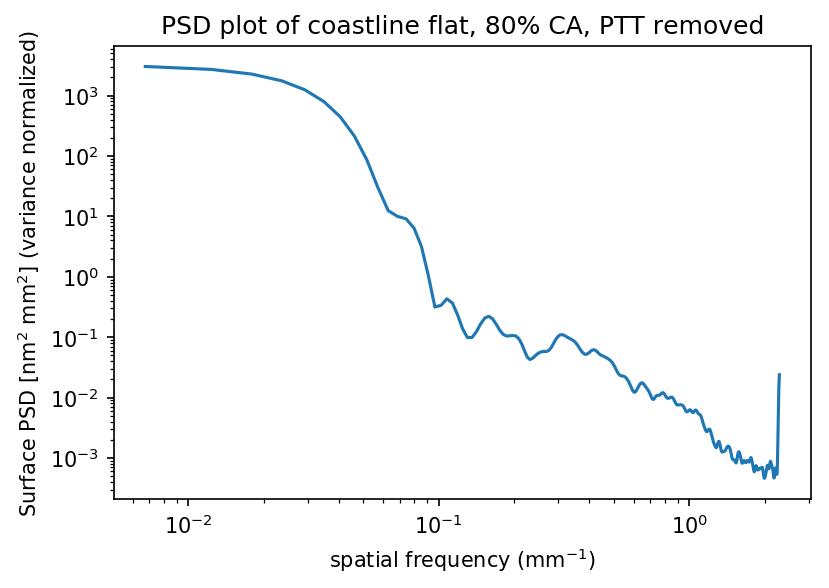

In [3]:
# Test with the coastline flat
ntot_cf = 1 # goes from 1-8
D_full_cf = 50*u.mm
ca_80 = 80
oversamp_size = 4096
dr_width = 5
npix_diam_cf = []
var_cf = []

for ntest in range(0,ntot_cf):
    # open the optic surface
    surf_loc = 'zygo_data/flat_mirrors/coastline_flat_correct.fits'
    surf_data = fits.getdata(surf_loc)
    
    # calculate the power optic data
    (pwr_opt, npix_diam, ap_var) = psd.calc_surfPower(surf_data, D_full_cf, ca_80, oversamp_size)
    
    # calculate the spatial frequency content
    (delta_k, FT_freq) = psd.calc_spatialFreq(oversamp_size, npix_diam, ca_80, D_full_cf)
    
    # normalize the PSD
    #norm_psd = psd.calc_normPSD(pwr_opt, delta_k)
    norm_psd = psd.calc_measurePSD(pwr_opt, ap_var, delta_k)
    #new_psd = pwr_optic/np.sum(norm_psd)
    
    # calculate the PSD data from the variance-normalized PSD
    (kval, mean_val) = psd.calc_radialPSD(norm_psd, FT_freq, dr_width)
        
    print('Finished calculating PSD for surface {}'.format(ntest))
    # if this is the first loop, initialize variables.
    # There's gotta be a smarter way to do this.
    if ntest == 0:
        kval_cf = np.zeros((ntot_cf, np.shape(kval)[0]))
        mean_psd_cf = np.zeros((ntot_cf, np.shape(mean_val)[0]))
    
    kval_cf[ntest,:] = copy.copy(kval)
    mean_psd_cf[ntest,:] = copy.copy(mean_val)
    npix_diam_cf.append(npix_diam)
    var_cf.append(ap_var)

# convert mean from mm^2 mm^2 to nm^2 mm^2
n_surf = 0
plt.figure(dpi=150)
#mean_val_nm2 = [i*1e12 for i in mean_psd_arr[0,:]]
#plt.loglog(kval_cf[n_surf,:], mean_psd_cf[n_surf,:])
plt.loglog(kval_cf[n_surf,:], [i*1e12 for i in mean_psd_cf[n_surf,:]])
plt.title('PSD plot of coastline flat, 80% CA, PTT removed')
plt.xlabel('spatial frequency (mm$^{-1}$)')
plt.ylabel('Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)') 

In [5]:
# 1 inch flats (8 total)

ca_80 = 80
oversamp_size = 4096
dr_width = 5
ntot_1 = 8 # goes from 1-8
D_full_1 = 25.4*u.mm

# initialize variables
npix_diam_1 = []
var_1 = []
surf_pwr_1 = np.zeros((ntot_1, oversamp_size, oversamp_size))

print('Crunching individual PSDs for 1 inch flats ({} total mirrors)'.format(ntot_1))
for ntest in range(0,ntot_1):
    # open the optic surface
    surf_loc = 'zygo_data/flat_mirrors/median_combined/1in_n{}_mediansurface.fits'.format(ntest+1)
    surf_data = fits.getdata(surf_loc)*u.um*(u.mm/(1e3*u.um)) # set units and convert um to mm
    
    # calculate the power optic data
    (pwr_opt, npix_diam, ap_var) = psd.calc_surfPower(surf_data, D_full_1, ca_80, oversamp_size)
    
    # calculate the spatial frequency content
    (delta_k, FT_freq) = psd.calc_spatialFreq(oversamp_size, npix_diam, ca_80, D_full_1)
    
    # normalize the PSD
    norm_psd = psd.calc_measurePSD(pwr_opt, ap_var, delta_k)
    
    # calculate the PSD data from the variance-normalized PSD
    (kval, mean_val) = psd.calc_radialPSD(norm_psd, FT_freq, dr_width)
    
    print('Finished calculating PSD for surface {}'.format(ntest))
    # if this is the first loop, initialize variables.
    # There's gotta be a smarter way to do this.
    if ntest == 0:
        kval_1 = np.zeros((ntot_1, np.shape(kval)[0]))
        mean_psd_1 = np.zeros((ntot_1, np.shape(mean_val)[0]))
    
    kval_1[ntest,:] = copy.copy(kval)
    mean_psd_1[ntest,:] = copy.copy(mean_val)
    npix_diam_1.append(npix_diam)
    var_1.append(ap_var)
    surf_pwr_1[ntest,:,:] = copy.copy(pwr_opt)

Crunching individual PSDs for 1 inch flats (8 total mirrors)
Finished calculating PSD for surface 0
Finished calculating PSD for surface 1
Finished calculating PSD for surface 2
Finished calculating PSD for surface 3
Finished calculating PSD for surface 4
Finished calculating PSD for surface 5
Finished calculating PSD for surface 6
Finished calculating PSD for surface 7


In [86]:
npix_diam_1

[220, 224, 224, 220, 224, 224, 224, 224]

In [17]:
t_var = np.zeros((ntot_1))
t2_var = np.zeros((ntot_1))
var_set = np.zeros((ntot_1))
for ntest in range(0,ntot_1):
    # open the optic surface
    surf_loc = 'zygo_data/flat_mirrors/median_combined/1in_n{}_mediansurface.fits'.format(ntest+1)
    surf_data = fits.getdata(surf_loc)
    
    # calculate the power optic data
    (pwr_opt, npix_diam, ap_var) = psd.calc_surfPower(surf_data, D_full_1, ca_80, oversamp_size)
    
    # calculate the spatial frequency content
    (delta_k, FT_freq) = psd.calc_spatialFreq(oversamp_size, npix_diam, ca_80, D_full_1)
    
    # normalize the PSD the old way so it matches with the variance.
    t_psd = psd.calc_measurePSD(pwr_opt, ap_var, delta_k)
    t_var[ntest] = np.sum(t_psd)*(delta_k**2)
    
    # normalize it the new way and multiply by variance to see how that compares.
    t2_psd = psd.calc_normPSD(pwr_opt, delta_k) * ap_var
    t2_var[ntest] = np.sum(t2_psd)*(delta_k**2)
    
    # save the variance
    var_set[ntest] = ap_var

PSD normalized: var=1.000
PSD normalized: var=1.000
PSD normalized: var=1.000
PSD normalized: var=1.000
PSD normalized: var=1.000
PSD normalized: var=1.000
PSD normalized: var=1.000
PSD normalized: var=1.000


In [18]:
t_var

array([9.16865603e-12, 9.52341772e-12, 1.19600567e-11, 6.52244300e-12,
       7.26890213e-12, 1.04290430e-11, 4.98017726e-12, 9.20768791e-12])

In [20]:
var_set

array([9.16865603e-12, 9.52341772e-12, 1.19600567e-11, 6.52244300e-12,
       7.26890213e-12, 1.04290430e-11, 4.98017726e-12, 9.20768791e-12])

In [21]:
t2_var

array([9.16865603e-12, 9.52341772e-12, 1.19600567e-11, 6.52244300e-12,
       7.26890213e-12, 1.04290430e-11, 4.98017726e-12, 9.20768791e-12])

In [45]:
np.sqrt(var_set)

array([3.02797887e-06, 3.08600352e-06, 3.45833149e-06, 2.55390740e-06,
       2.69609016e-06, 3.22940288e-06, 2.23163108e-06, 3.03441723e-06])

In [27]:
# generate the averages
nkval = np.shape(kval_1)[1]

# step 1: Collect the individual surface variances and get the average
avg_tot_var = np.mean(var_1)
avg_tot_rms = np.sqrt(avg_tot_var)*1e6 # in nm from mm

# step 2: Make a collection of variance-normalized PSDs
delta_k = kval_1[ntest,1] - kval_1[ntest,0]
all_norm_psd_sets = np.zeros((ntot_1, oversamp_size, oversamp_size))
var_check = np.zeros((ntot_1))
for ntest in range(0, ntot_1):
    all_norm_psd_sets[ntest,:,:] = psd.calc_normPSD(surf_pwr_1[ntest, :, :],  delta_k)
    var_check[ntest] = np.sum(all_norm_psd_sets[ntest,:,:])*(delta_k**2)

var_check

PSD normalized: var=1.000
PSD normalized: var=1.000
PSD normalized: var=1.000
PSD normalized: var=1.000
PSD normalized: var=1.000
PSD normalized: var=1.000
PSD normalized: var=1.000
PSD normalized: var=1.000


array([1., 1., 1., 1., 1., 1., 1., 1.])

In [28]:
# Step 3: Take average of collection of variance-normalized PSDs
avg_psd_1 = np.zeros((oversamp_size, oversamp_size))
for i in range(0,oversamp_size):
    for j in range(0,oversamp_size):
        avg_psd_1[i,j] = np.mean(all_norm_psd_sets[:,i,j])
np.sum(avg_psd_1)*(delta_k**2)

0.9999999999999979

In [29]:
avg_psd_2 = np.zeros((oversamp_size, oversamp_size))
for i in range(0,ntot_1):
    avg_psd_2 += all_norm_psd_sets[i,:,:]
avg_psd_2 /= ntot_1
np.sum(avg_psd_2)*(delta_k**2)

0.9999999999999979

In [30]:
# Step 4: scale the average PSD by the average of collection of individual variances in step 1
norm_psd = avg_psd_2 *avg_tot_var

# then calculate the radial profile
(avg_kval, avg_mean_psd) = psd.calc_radialPSD(norm_psd, FT_freq, dr_width)

In [31]:
(np.sum(norm_psd)*(delta_k**2)), avg_tot_var

(8.632547965036307e-12, 8.632547965036301e-12)

In [13]:
# generate the naive PSD average
nkval = np.shape(kval_1)[1]
easy_psd_1 = np.zeros(nkval)
for nk in range(0,nkval):
    easy_psd_1[nk] = np.mean(mean_psd_1[:,nk])

In [36]:
# generate part of the plot with all normalized PSDs
var_t1 = np.zeros((ntot_1))
for i in range(0, ntot_1):
    var_t1[i] = np.sum(all_norm_psd_sets[i,:,:])*(delta_k**2)
    
    # calculate the PSD data from the variance-normalized PSD
    (kval, mean_val) = psd.calc_radialPSD(all_norm_psd_sets[i,:,:], FT_freq, dr_width)
    
    print('Finished calculating normalized PSD for surface {}'.format(i))
    # if this is the first loop, initialize variables.
    # There's gotta be a smarter way to do this.
    if i == 0:
        kval_t1 = np.zeros((ntot_1, np.shape(kval)[0]))
        mean_psd_t1 = np.zeros((ntot_1, np.shape(mean_val)[0]))
    
    kval_t1[i,:] = copy.copy(kval)
    mean_psd_t1[i,:] = copy.copy(mean_val)

Finished calculating normalized PSD for surface 0
Finished calculating normalized PSD for surface 1
Finished calculating normalized PSD for surface 2
Finished calculating normalized PSD for surface 3
Finished calculating normalized PSD for surface 4
Finished calculating normalized PSD for surface 5
Finished calculating normalized PSD for surface 6
Finished calculating normalized PSD for surface 7


In [37]:
var_t1

array([1., 1., 1., 1., 1., 1., 1., 1.])

Text(0, 0.5, 'Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)')

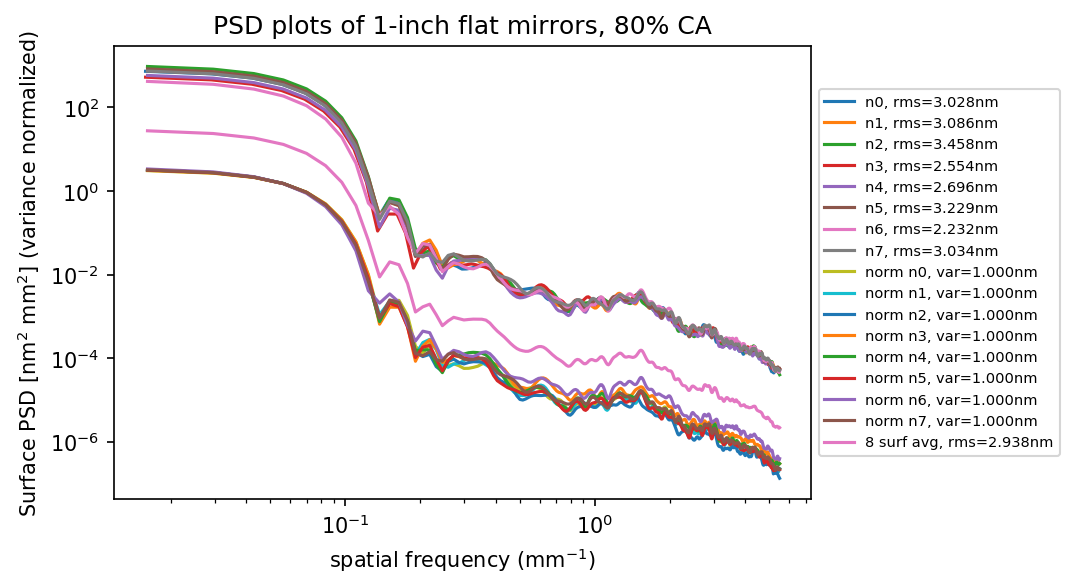

In [42]:
# convert mean from mm^2 mm^2 to nm^2 mm^2
#mean_val_nm2 = [i*1e12 for i in mean_psd_arr[0,:]]
rms_1 = np.sqrt(var_1)*1e6 # converts mm to nm
rms_t1 = np.sqrt(var_t1) # converts mm to nm
plt.figure(dpi=150)
for ns in range(0,ntot_1):
    plt.loglog(kval_1[ns,:], [i*1e12 for i in mean_psd_1[ns,:]], label='n{}, rms={:.3f}nm'.format(ns, rms_1[ns]))
for ns in range(0,ntot_1):
    plt.loglog(kval_t1[ns,:], [i*1e12 for i in mean_psd_t1[ns,:]], label='norm n{}, var={:.3f}nm'.format(ns, var_t1[ns]))
plt.loglog(avg_kval, [i*1e12 for i in avg_mean_psd], label='{} surf avg, rms={:.3f}'.format(ntot_1, avg_tot_rms))
#plt.loglog(avg_kval, [i*1e12 for i in easy_psd_1], label='naive avg')
plt.title('PSD plots of 1-inch flat mirrors, 80% CA')
plt.legend(prop={'size':7}, loc='center left',bbox_to_anchor=(1, 0.5))
plt.xlabel('spatial frequency (mm$^{-1}$)')
plt.ylabel('Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)') 

In [72]:
w=142*u.um
w

<Quantity 142. um>

Text(0, 0.5, 'Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)')

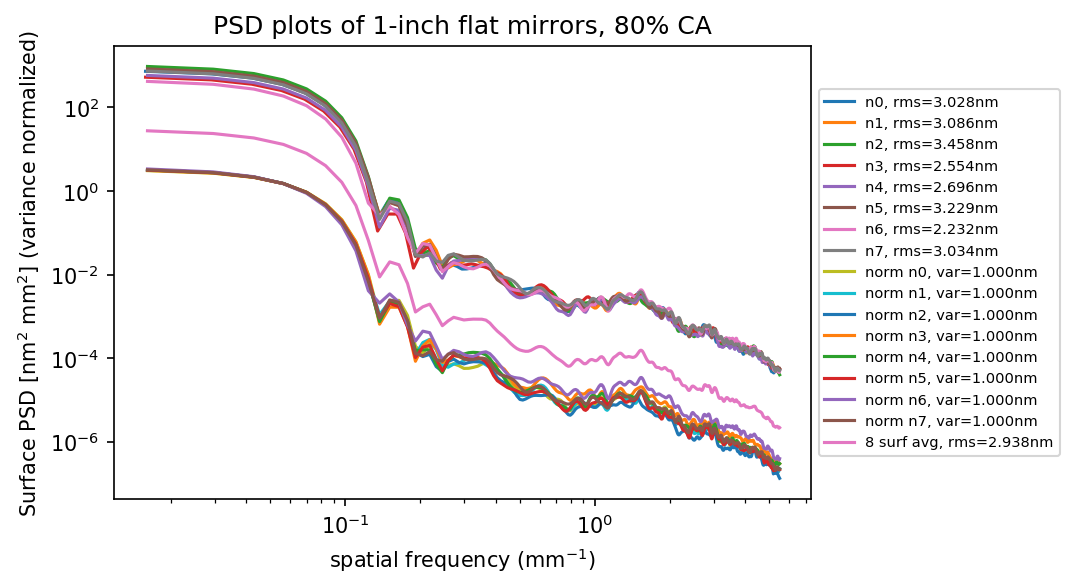

In [42]:
# convert mean from mm^2 mm^2 to nm^2 mm^2
#mean_val_nm2 = [i*1e12 for i in mean_psd_arr[0,:]]
rms_1 = np.sqrt(var_1)*1e6 # converts mm to nm
rms_t1 = np.sqrt(var_t1) # converts mm to nm
plt.figure(dpi=150)
for ns in range(0,ntot_1):
    plt.loglog(kval_1[ns,:], [i*1e12 for i in mean_psd_1[ns,:]], label='n{}, rms={:.3f}nm'.format(ns, rms_1[ns]))
for ns in range(0,ntot_1):
    plt.loglog(kval_t1[ns,:], [i for i in mean_psd_t1[ns,:]], label='norm n{}, var={:.3f}nm'.format(ns, var_t1[ns]))
plt.loglog(avg_kval, [i*1e12 for i in avg_mean_psd], label='{} surf avg, rms={:.3f}'.format(ntot_1, avg_tot_rms))
#plt.loglog(avg_kval, [i*1e12 for i in easy_psd_1], label='naive avg')
plt.title('PSD plots of 1-inch flat mirrors, 80% CA')
plt.legend(prop={'size':7}, loc='center left',bbox_to_anchor=(1, 0.5))
plt.xlabel('spatial frequency (mm$^{-1}$)')
plt.ylabel('Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)') 

In [65]:
mm2nm = (1*u.mm) / (1e6*u.nm)
1/mm2nm

<Quantity 1000000. nm / mm>

In [66]:
q= var_1 * u.mm * u.mm
q

<Quantity [9.16865603e-12, 9.52341772e-12, 1.19600567e-11, 6.52244300e-12,
           7.26890213e-12, 1.04290430e-11, 4.98017726e-12, 9.20768791e-12] mm2>

In [69]:
np.sqrt(q)

<Quantity [3.02797887e-06, 3.08600352e-06, 3.45833149e-06, 2.55390740e-06,
           2.69609016e-06, 3.22940288e-06, 2.23163108e-06, 3.03441723e-06] mm>

In [78]:
q.unit

Unit("mm2")

Text(0, 0.5, 'Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)')

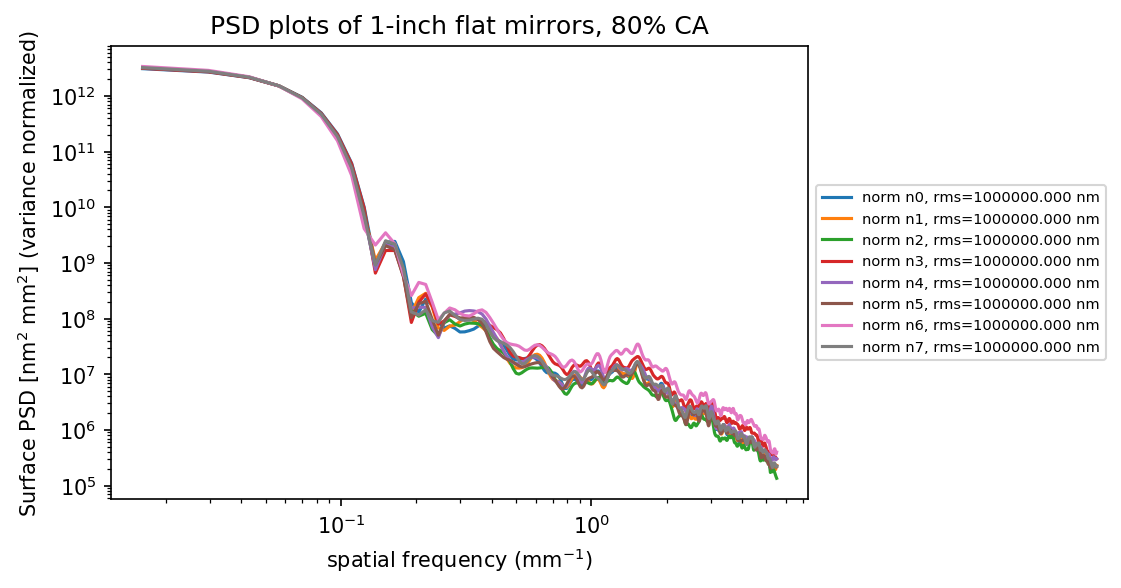

In [76]:
# convert mean from mm^2 mm^2 to nm^2 mm^2
#mean_val_nm2 = [i*1e12 for i in mean_psd_arr[0,:]]
rms_1 = np.sqrt(var_1*u.mm*u.mm/(mm2nm*mm2nm)) # converts mm to nm
rms_t1 = np.sqrt(var_t1*u.mm*u.mm/(mm2nm*mm2nm)) # converts mm to nm
avg_tot_rms = np.sqrt(avg_tot_var*u.mm*u.mm/(mm2nm*mm2nm)) # in nm from mm
plt.figure(dpi=150)
#for ns in range(0,ntot_1):
#    plt.loglog(kval_1[ns,:], [i*1e12 for i in mean_psd_1[ns,:]], label='n{}, rms={:.3f}'.format(ns, rms_1[ns]))
#plt.loglog(avg_kval, [i*1e12 for i in avg_mean_psd], label='{} surf avg, rms={:.3f}'.format(ntot_1, avg_tot_rms))
for ns in range(0,ntot_1):
    plt.loglog(kval_t1[ns,:], [i*1e12 for i in mean_psd_t1[ns,:]], label='norm n{}, rms={:.3f}'.format(ns, rms_t1[ns]))

#plt.loglog(avg_kval, [i*1e12 for i in easy_psd_1], label='naive avg')
plt.title('PSD plots of 1-inch flat mirrors, 80% CA')
plt.legend(prop={'size':7}, loc='center left',bbox_to_anchor=(1, 0.5))
plt.xlabel('spatial frequency (mm$^{-1}$)')
plt.ylabel('Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)') 

In [49]:
# generate the averages
nkval = np.shape(kval_1)[1]

# step 1: Collect the individual surface variances and get the average
avg_tot_var = np.mean(var_1)
avg_tot_rms = np.sqrt(avg_tot_var)*1e6 # in nm from mm

# step 2: Make a collection of variance-normalized PSDs
all_norm_psd_sets = np.zeros((ntot_1, oversamp_size, oversamp_size))
for ntest in range(0, ntot_1):
    all_norm_psd_sets[ntest,:,:] = psd.calc_normPSD(surf_pwr_1[ntest, :, :], var_1[ntest], kval_1[ntest,1] - kval_1[ntest,0])

# Step 3: Take average of collection of variance-normalized PSDs
avg_psd_1 = np.zeros((oversamp_size, oversamp_size))
delta_k = kval_1[ntest,1] - kval_1[ntest,0]
for i in range(0,oversamp_size):
    for j in range(0,oversamp_size):
        avg_psd_1[i,j] = np.mean(all_norm_psd_sets[:,i,j])

# Step 4: scale the average PSD by the average of collection of individual variances in step 1
sf = (np.sum(avg_psd_1)*(delta_k**2))/avg_tot_var
norm_psd = avg_psd_1 * sf

# then calculate the radial profile
(avg_kval, avg_mean_psd) = psd.calc_radialPSD(norm_psd, FT_freq, dr_width)


In [54]:
# Step 4: scale the average PSD by the average of collection of individual variances in step 1
sf = (np.sum(avg_psd_1)*(delta_k**2))/avg_tot_var
norm_psd = avg_psd_1 * avg_tot_var

# then calculate the radial profile
(avg_kval, avg_mean_psd) = psd.calc_radialPSD(norm_psd, FT_freq, dr_width)

In [68]:
indiv_var = []
sf_set = []
for ntest in range(0, ntot_1):
    var_i = np.sum(all_norm_psd_sets[ntest,:,:])*(delta_k**2)
    sf_i = var_i/var_1[ntest]
    sf_set.append(sf_i)
    n_psd = all_norm_psd_sets[ntest,:,:]*sf_i
    indiv_var.append(np.sum(n_psd)*(delta_k**2))

In [72]:
sf_set

[1.0366942148760339,
 1.0000000000000024,
 0.9999999999999986,
 1.0366942148760334,
 0.9999999999999981,
 0.9999999999999968,
 1.0000000000000009,
 0.9999999999999988]

In [70]:
var_1

[9.168656034627703e-12,
 9.52341772332496e-12,
 1.1960056706198839e-11,
 6.522443002791295e-12,
 7.268902132709689e-12,
 1.0429042957816849e-11,
 4.980177257195722e-12,
 9.20768790562536e-12]

In [69]:
indiv_var

[9.85387458211019e-12,
 9.52341772332501e-12,
 1.1960056706198806e-11,
 7.009897096775256e-12,
 7.268902132709659e-12,
 1.042904295781678e-11,
 4.980177257195732e-12,
 9.207687905625335e-12]

In [60]:
var_1

[9.168656034627703e-12,
 9.52341772332496e-12,
 1.1960056706198839e-11,
 6.522443002791295e-12,
 7.268902132709689e-12,
 1.0429042957816849e-11,
 4.980177257195722e-12,
 9.20768790562536e-12]

In [63]:
np.sqrt(avg_tot_var)*1e6

2.938119801001365

Text(0, 0.5, 'Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)')

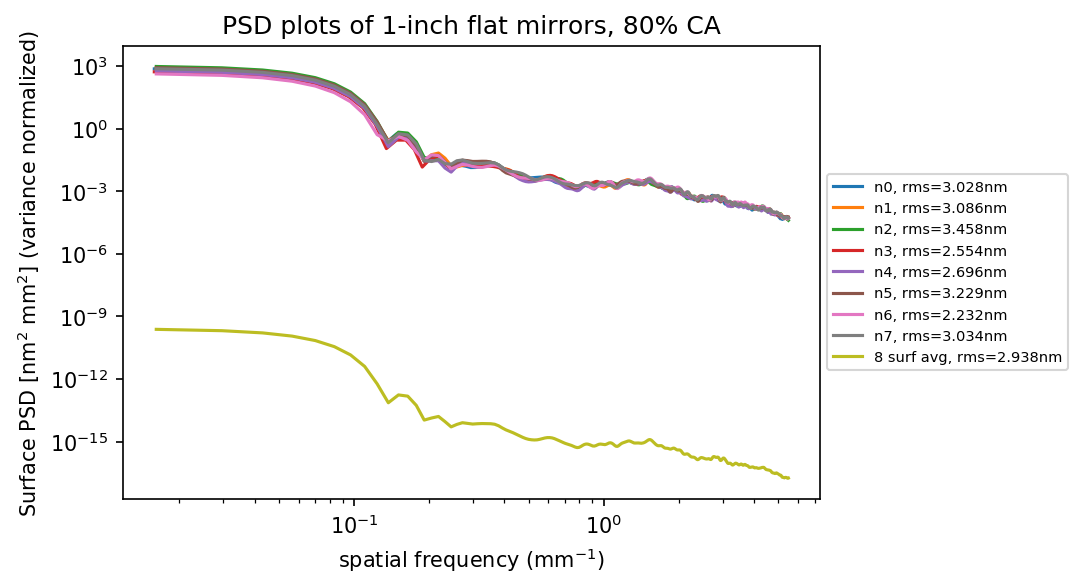

In [58]:
# convert mean from mm^2 mm^2 to nm^2 mm^2
#mean_val_nm2 = [i*1e12 for i in mean_psd_arr[0,:]]
rms_1 = np.sqrt(var_1)*1e6 # converts mm to nm
plt.figure(dpi=150)
for ns in range(0,ntot_1):
    plt.loglog(kval_1[ns,:], [i*1e12 for i in mean_psd_1[ns,:]], label='n{}, rms={:.3f}nm'.format(ns, rms_1[ns]))
plt.loglog(avg_kval, [i*1e12 for i in avg_mean_psd], label='{} surf avg, rms={:.3f}nm'.format(ntot_1, avg_tot_rms))
plt.title('PSD plots of 1-inch flat mirrors, 80% CA')
plt.legend(prop={'size':7}, loc='center left',bbox_to_anchor=(1, 0.5))
plt.xlabel('spatial frequency (mm$^{-1}$)')
plt.ylabel('Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)') 

Text(0, 0.5, 'Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)')

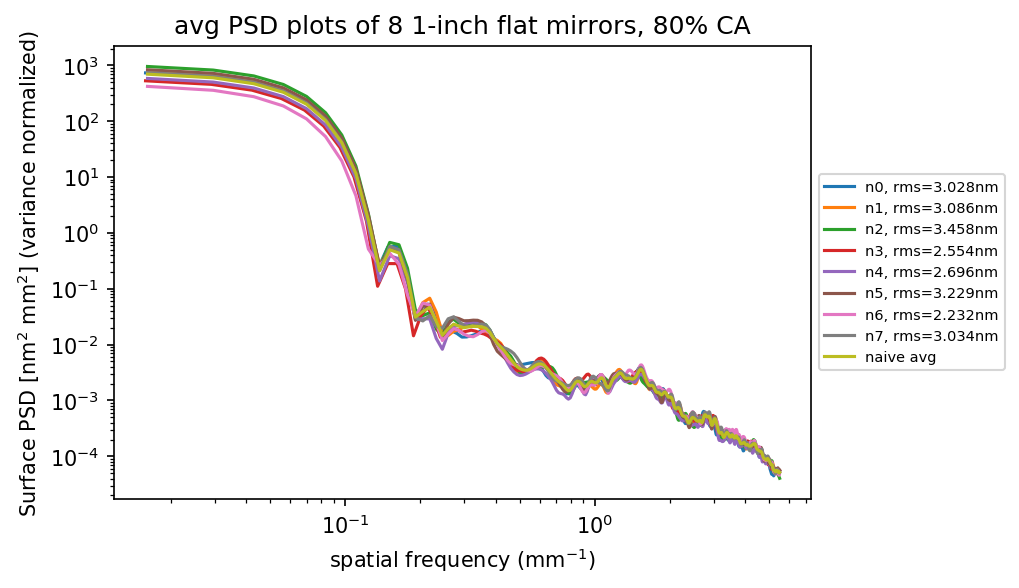

In [59]:
# generate the averages
nkval = np.shape(kval_1)[1]
easy_psd_1 = np.zeros(nkval)
for nk in range(0,nkval):
    easy_psd_1[nk] = np.mean(mean_psd_1[:,nk])
    
plt.figure(dpi=150)
for ns in range(0,ntot_1):
    plt.loglog(kval_1[ns,:], [i*1e12 for i in mean_psd_1[ns,:]], label='n{}, rms={:.3f}nm'.format(ns, rms_1[ns]))
plt.loglog(avg_kval, [i*1e12 for i in easy_psd_1], label='naive avg')
plt.legend(prop={'size':7}, loc='center left',bbox_to_anchor=(1, 0.5))
plt.title('avg PSD plots of 8 1-inch flat mirrors, 80% CA')
plt.xlabel('spatial frequency (mm$^{-1}$)')
plt.ylabel('Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)') 

Text(0, 0.5, 'Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)')

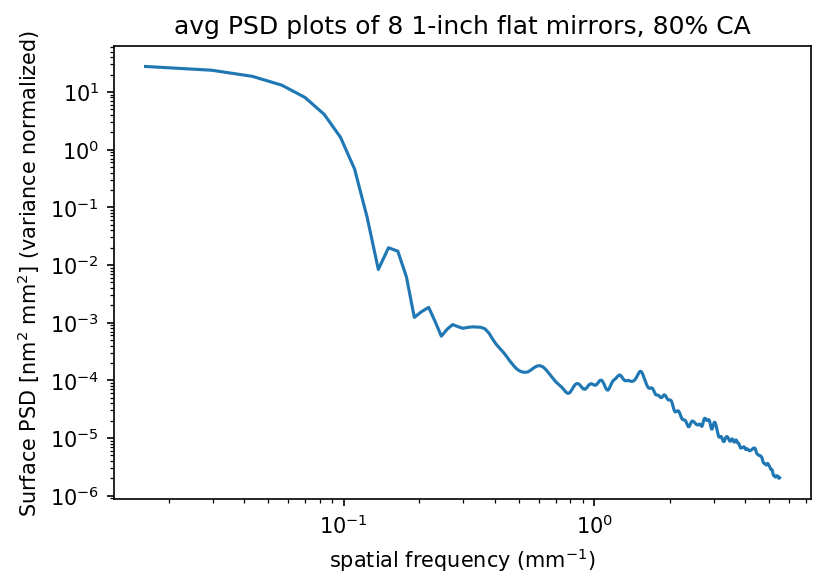

In [38]:
plt.figure(dpi=150)
plt.loglog(avg_kval, [i*1e12 for i in avg_mean_psd])
plt.title('avg PSD plots of 8 1-inch flat mirrors, 80% CA')
plt.xlabel('spatial frequency (mm$^{-1}$)')
plt.ylabel('Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)') 

ValueError: x and y must have same first dimension, but have shapes (408,) and (4096, 4096)

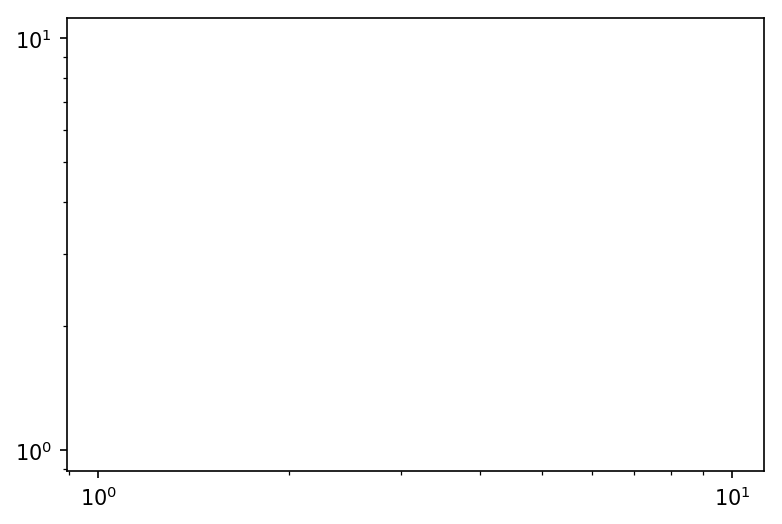

In [39]:
easy_avg = 

plt.figure(dpi=150)
plt.loglog(avg_kval, [i*1e12 for i in avg_psd_1])
plt.title('avg PSD plots of 8 1-inch flat mirrors, 80% CA')
plt.xlabel('spatial frequency (mm$^{-1}$)')
plt.ylabel('Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)') 

In [33]:
FT_freq

<Quantity [ 0.        ,  0.00269131,  0.00538263, ..., -0.00807394,
           -0.00538263, -0.00269131] pix / mm>

In [18]:
avg_tot_var

8.632547965036301e-12

In [13]:
# generate the averages
nkval = np.shape(kval_1)[1]
var_psd_1 = np.zeros(nkval)
sf_psd_1 = np.zeros(nkval)
norm_psd_1 = np.zeros(np.shape(mean_psd_1))
avg_psd_1 = np.zeros(nkval)
for nk in range(0,nkval):
    var_psd_1[nk] = np.var(mean_psd_1[:,nk])
    sf_psd_1[nk] = np.sum(mean_psd_1[:,nk])/var_psd_1[nk]
for ms in range(0,ntot_1):
    for nk in range(0,nkval):
        norm_psd_1[ms,nk] = mean_psd_1[ms,nk]/var_psd_1[nk]
for nk in range(0,nkval):
    avg_psd_1[nk] = np.mean(norm_psd_1[:,nk])


Text(0, 0.5, 'Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)')

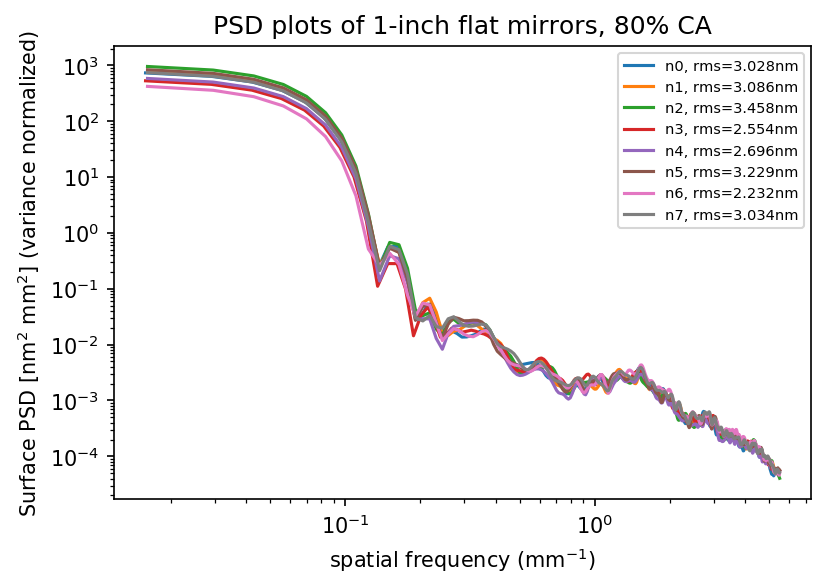

In [14]:
# convert mean from mm^2 mm^2 to nm^2 mm^2
#mean_val_nm2 = [i*1e12 for i in mean_psd_arr[0,:]]
rms_1 = np.sqrt(var_1)*1e6 # converts mm to nm
plt.figure(dpi=150)
for ns in range(0,ntot_1):
    plt.loglog(kval_1[ns,:], [i*1e12 for i in mean_psd_1[ns,:]], label='n{}, rms={:.3f}nm'.format(ns, rms_1[ns]))
#plt.loglog(kval_1[0][:], alpha_fit, label='alpha={}'.format(alpha))
plt.title('PSD plots of 1-inch flat mirrors, 80% CA')
plt.legend(prop={'size':7})
plt.xlabel('spatial frequency (mm$^{-1}$)')
plt.ylabel('Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)') 

Text(0, 0.5, 'Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)')

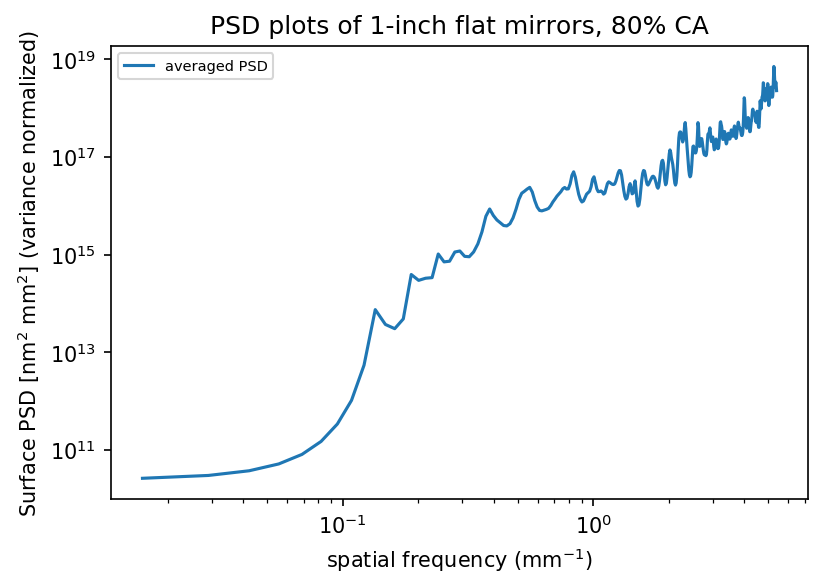

In [15]:
plt.figure(dpi=150)
plt.loglog(kval_1[0][:], avg_psd_1, label='averaged PSD')
plt.title('PSD plots of 1-inch flat mirrors, 80% CA')
plt.legend(prop={'size':7})
plt.xlabel('spatial frequency (mm$^{-1}$)')
plt.ylabel('Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)') 

In [10]:
np.shape(kval_1)[0]

8

## OLD CODE VERSION

In [9]:
# 1 inch flats (8 total)

ca_val = 80
dr_width = 5

ntot_1 = 8 # goes from 1-8
D_full_1 = 25.4*u.mm
npix_diam_1 = []
var_1 = []

print('Crunching PSDs for 1 inch flats (8 total mirrors)')

for ntest in range(0,ntot_1):
    # open the optic surface
    surf_loc = 'zygo_data/flat_mirrors/median_combined/1in_n{}_mediansurface.fits'.format(ntest+1)
    
    # pass in the data for generating PSD content
    (kval, mean_val, npix_diam, ap_var) = psd.calc_PSD(surf_loc, D_full_1, ca_val, dr_width)
    
    print('Finished calculating PSD for surface {}'.format(ntest))
    # if this is the first loop, initialize variables.
    # There's gotta be a smarter way to do this.
    if ntest == 0:
        kval_1 = np.zeros((ntot_1, np.shape(kval)[0]))
        mean_psd_1 = np.zeros((ntot_1, np.shape(mean_val)[0]))
    
    kval_1[ntest,:] = copy.copy(kval)
    mean_psd_1[ntest,:] = copy.copy(mean_val)
    npix_diam_1.append(npix_diam)
    var_1.append(ap_var)

Crunching PSDs for 1 inch flats (8 total mirrors)
Finished calculating PSD for surface 0
Finished calculating PSD for surface 1
Finished calculating PSD for surface 2
Finished calculating PSD for surface 3
Finished calculating PSD for surface 4
Finished calculating PSD for surface 5
Finished calculating PSD for surface 6
Finished calculating PSD for surface 7


In [4]:
# 19mm flats (2 total)

ca_val = 80
dr_width = 5

ntot_19 = 2 # goes from 1-2
D_full_19 = 19*u.mm
npix_diam_19 = []
var_19 = []

print('Crunching PSDs for 19mm flats ({} total mirrors)'.format(ntot_19))

for ntest in range(0,ntot_19):
    # open the optic surface
    surf_loc = 'zygo_data/flat_mirrors/median_combined/19mm_n{}_mediansurface.fits'.format(ntest+1)
    
    # pass in the data for generating PSD content
    (kval, mean_val, npix_diam, ap_var) = psd.calc_PSD(surf_loc, D_full_19, ca_val, dr_width)
    
    print('Finished calculating PSD for surface {}'.format(ntest))
    # if this is the first loop, initialize variables.
    # There's gotta be a smarter way to do this.
    if ntest == 0:
        kval_19 = np.zeros((ntot_19, np.shape(kval)[0]))
        mean_psd_19 = np.zeros((ntot_19, np.shape(mean_val)[0]))
    
    kval_19[ntest,:] = copy.copy(kval)
    mean_psd_19[ntest,:] = copy.copy(mean_val)
    npix_diam_19.append(npix_diam)
    var_19.append(ap_var)

Crunching PSDs for 19mm flats (2 total mirrors)
Finished calculating PSD for surface 0
Finished calculating PSD for surface 1


In [5]:
# 0.5 inch flats (1 total)

ca_val = 80
dr_width = 5

ntot_05 = 1 # goes from 1
D_full_05 = 12.7*u.mm
npix_diam_05 = []
var_05 = []

print('Crunching PSDs for 0.5 inch flats ({} total mirrors)'.format(ntot_05))

for ntest in range(0,ntot_05):
    # open the optic surface
    surf_loc = 'zygo_data/flat_mirrors/median_combined/0p5in_n{}_mediansurface.fits'.format(ntest+1)
    
    # pass in the data for generating PSD content
    (kval, mean_val, npix_diam, ap_var) = psd.calc_PSD(surf_loc, D_full_05, ca_val, dr_width)
    
    print('Finished calculating PSD for surface {}'.format(ntest))
    # if this is the first loop, initialize variables.
    # There's gotta be a smarter way to do this.
    if ntest == 0:
        kval_05 = np.zeros((ntot_05, np.shape(kval)[0]))
        mean_psd_05 = np.zeros((ntot_05, np.shape(mean_val)[0]))
    
    kval_05[ntest,:] = copy.copy(kval)
    mean_psd_05[ntest,:] = copy.copy(mean_val)
    npix_diam_05.append(npix_diam)
    var_05.append(ap_var)

Crunching PSDs for 0.5 inch flats (1 total mirrors)
Finished calculating PSD for surface 0


## Build the PSD plots

In [17]:
npix_diam_1, npix_diam_05, npix_diam_19

([220, 220, 220, 220, 220, 220, 220, 220], [192], [168, 168])

In [19]:
np.shape(kval_1), np.shape(kval_05), np.shape(kval_19)

((8, 408), (1, 408), (2, 408))

In [28]:
for no in range(0,ntot_1):
    print('deltak at n{}: {}'.format(no,kval_1[0][1] - kval_1[0][0]))

deltak at n0: 0.013216273991141728
deltak at n1: 0.013216273991141728
deltak at n2: 0.013216273991141728
deltak at n3: 0.013216273991141728
deltak at n4: 0.013216273991141728
deltak at n5: 0.013216273991141728
deltak at n6: 0.013216273991141728
deltak at n7: 0.013216273991141728


In [25]:
alpha = 2
alpha_fit = 1/(kval_1[0][:]**alpha)

In [31]:
beta = np.zeros((ntot_1))
for ns in range(0,ntot_1):
    kmin = 1/(D_full_1.value*ca_val/100)
    kmax = 1/(2*D_full_1.value*(ca_val/100)/npix_diam_1[ns])
    beta[ns] = var_1[ns] / (2*np.pi * np.log(kmax/kmin) )
beta

array([3.16023293e-13, 3.03783599e-13, 3.81038900e-13, 2.25331885e-13,
       2.31614823e-13, 3.32070514e-13, 1.56813358e-13, 2.92517134e-13])

In [3]:
beta_avg1 = np.mean(beta)

kmin = 1/(D_full_1.value*ca_val/100)
kmax = 1/(2*D_full_1.value*(ca_val/100)/np.mean(npix_diam_1[ns]))
beta_avg2 = np.mean(var_1) / (2*np.pi * np.log(kmax/kmin) )

beta_avg1, beta_avg2

NameError: name 'beta' is not defined

Text(0, 0.5, 'Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)')

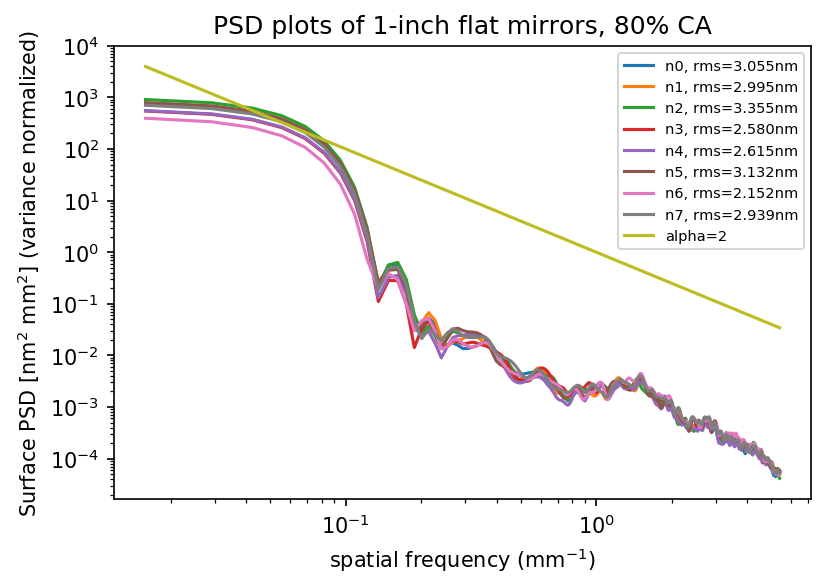

In [27]:
# convert mean from mm^2 mm^2 to nm^2 mm^2
#mean_val_nm2 = [i*1e12 for i in mean_psd_arr[0,:]]
rms_1 = np.sqrt(var_1)*1e6 # converts mm to nm
plt.figure(dpi=150)
for ns in range(0,ntot_1):
    plt.loglog(kval_1[ns,:], [i*1e12 for i in mean_psd_1[ns,:]], label='n{}, rms={:.3f}nm'.format(ns, rms_1[ns]))
plt.loglog(kval_1[0][:], alpha_fit, label='alpha={}'.format(alpha))
plt.title('PSD plots of 1-inch flat mirrors, 80% CA')
plt.legend(prop={'size':7})
plt.xlabel('spatial frequency (mm$^{-1}$)')
plt.ylabel('Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)') 

Text(0, 0.5, 'Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)')

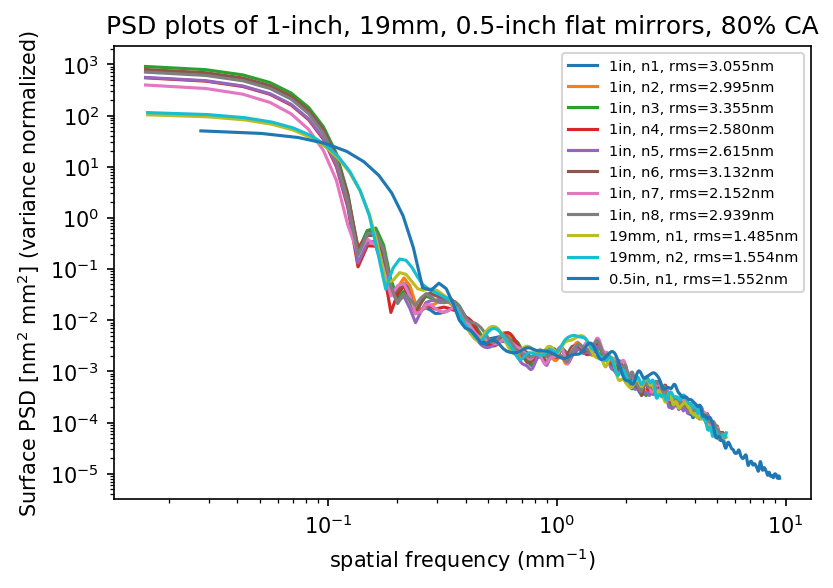

In [14]:
# convert mean from mm^2 mm^2 to nm^2 mm^2
#mean_val_nm2 = [i*1e12 for i in mean_psd_arr[0,:]]
rms_1 = np.sqrt(var_1)*1e6 # converts mm to nm
plt.figure(dpi=150)
for ns in range(0,ntot_1):
    plt.loglog(kval_1[ns,:], [i*1e12 for i in mean_psd_1[ns,:]], label='1in, n{}, rms={:.3f}nm'.format(ns+1, rms_1[ns]))
for ns in range(0,ntot_19):
    plt.loglog(kval_19[ns,:], [i*1e12 for i in mean_psd_19[ns,:]], label='19mm, n{}, rms={:.3f}nm'.format(ns+1, rms_19[ns]))
for ns in range(0,ntot_05):
    plt.loglog(kval_05[ns,:], [i*1e12 for i in mean_psd_05[ns,:]], label='0.5in, n{}, rms={:.3f}nm'.format(ns+1, rms_05[ns]))
plt.title('PSD plots of 1-inch, 19mm, 0.5-inch flat mirrors, 80% CA')
plt.legend(prop={'size':7})
plt.xlabel('spatial frequency (mm$^{-1}$)')
plt.ylabel('Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)') 

Text(0, 0.5, 'Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)')

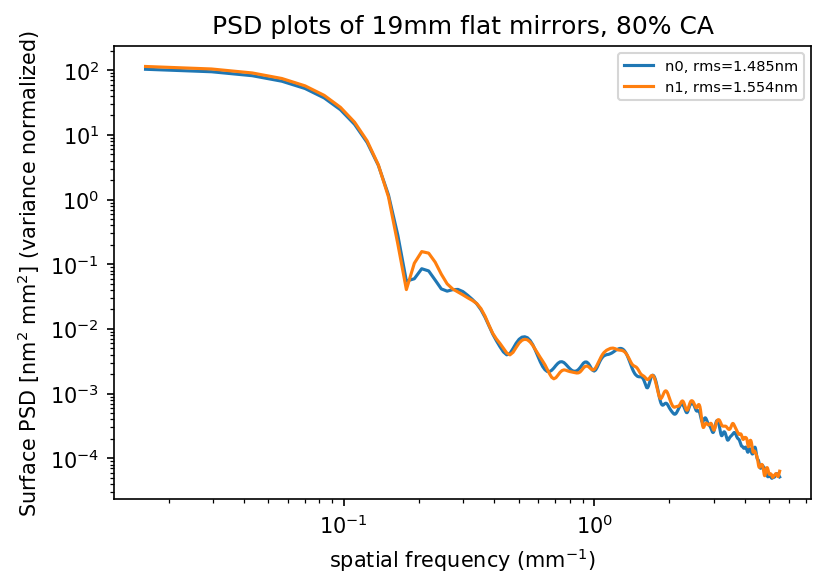

In [7]:
# convert mean from mm^2 mm^2 to nm^2 mm^2
#mean_val_nm2 = [i*1e12 for i in mean_psd_arr[0,:]]
rms_19 = np.sqrt(var_19)*1e6 # converts mm to nm
plt.figure(dpi=150)
for ns in range(0,ntot_19):
    plt.loglog(kval_19[ns,:], [i*1e12 for i in mean_psd_19[ns,:]], label='n{}, rms={:.3f}nm'.format(ns, rms_19[ns]))
plt.title('PSD plots of 19mm flat mirrors, 80% CA')
plt.legend(prop={'size':7})
plt.xlabel('spatial frequency (mm$^{-1}$)')
plt.ylabel('Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)') 

Text(0, 0.5, 'Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)')

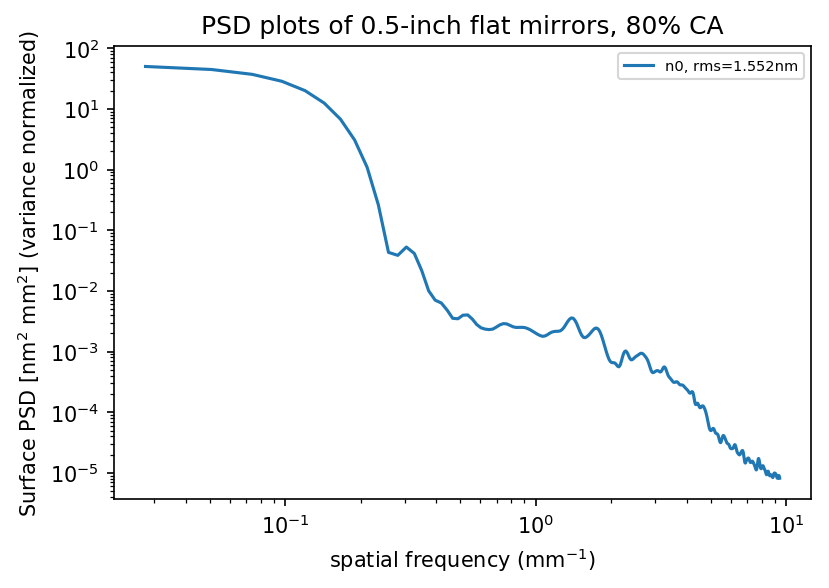

In [8]:
# convert mean from mm^2 mm^2 to nm^2 mm^2
#mean_val_nm2 = [i*1e12 for i in mean_psd_arr[0,:]]
rms_05 = np.sqrt(var_05)*1e6 # converts mm to nm
plt.figure(dpi=150)
for ns in range(0,ntot_05):
    plt.loglog(kval_05[ns,:], [i*1e12 for i in mean_psd_05[ns,:]], label='n{}, rms={:.3f}nm'.format(ns, rms_05[ns]))
plt.title('PSD plots of 0.5-inch flat mirrors, 80% CA')
plt.legend(prop={'size':7})
plt.xlabel('spatial frequency (mm$^{-1}$)')
plt.ylabel('Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)') 

## Investigating shapes of arrays
All content here is notes and nothing useful, maybe.

In [26]:
ntot_1in = 8 # goes from 1-8
data_shape_arr = []
new_optic_arr = []
for ntest in range(0,ntot_1in):
    # open the optic surface
    surf_loc = 'zygo_data/flat_mirrors/median_combined/1in_n{}_mediansurface.fits'.format(ntest+1)
    optic, optic_header = fits.getdata(surf_loc, header=True)
    
    # if the optics are not the same shape, cut down the edges of where there would be extra zeros.
    if np.shape(optic)[0] < np.shape(optic)[1]:
        diff = np.int(np.abs(np.shape(optic)[0] - np.shape(optic)[1]))
        new_optic = optic[:,np.int(diff/2):np.shape(optic)[1]-np.int(diff/2)]
    elif np.shape(optic)[0] > np.shape(optic)[1]:
        diff = np.int(np.abs(np.shape(optic)[0] - np.shape(optic)[1]))
        new_optic = optic[np.int(diff/2):np.shape(optic)[0]-np.int(diff/2),:]
    else:
        new_optic=optic
    
    new_optic_arr.append(np.shape(new_optic))


In [27]:
data_shape_arr

[(276, 276),
 (276, 280),
 (276, 280),
 (276, 276),
 (276, 280),
 (276, 280),
 (280, 276),
 (280, 276)]

In [28]:
new_optic_arr

[(276, 276),
 (276, 276),
 (276, 276),
 (276, 276),
 (276, 276),
 (276, 276),
 (276, 276),
 (276, 276)]

In [24]:
surf_loc = 'zygo_data/flat_mirrors/median_combined/1in_n2_mediansurface.fits'.format(ntest+1)
optic, optic_header = fits.getdata(surf_loc, header=True)
np.shape(optic)

(276, 280)

In [25]:
if np.shape(optic)[0] < np.shape(optic)[1]:
    diff = np.int(np.abs(np.shape(optic)[0] - np.shape(optic)[1]))
    new_optic = optic[:,np.int(diff/2):np.shape(optic)[1]-np.int(diff/2)]
elif np.shape(optic)[0] > np.shape(optic)[1]:
    diff = np.int(np.abs(np.shape(optic)[0] - np.shape(optic)[1]))
    new_optic = optic[np.int(diff/2):np.shape(optic)[0]-np.int(diff/2),:]
else:
    new_optic=optic
np.shape(new_optic)

(276, 276)

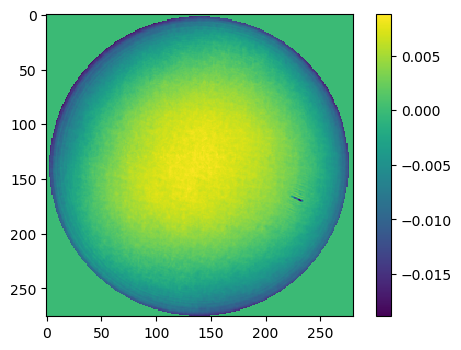

In [18]:
plt.figure(dpi=100)
plt.imshow(optic)
plt.colorbar()

In [19]:
optic_data = psd.zeroPadSquare(optic)
np.shape(optic_data)

(280, 280)

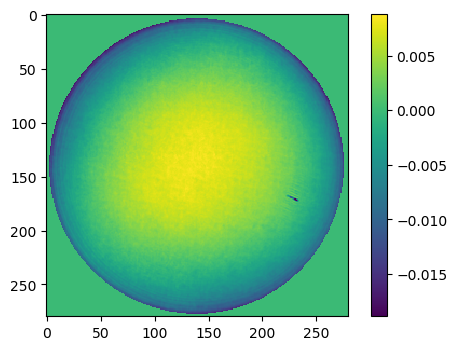

In [20]:
plt.figure(dpi=100)minimum
plt.imshow(optic_data)
plt.colorbar()

In [5]:
ntot_2in = 8 # goes from 1-8
data_shape_arr_2in = []
for ntest in range(0,ntot_2in):
    # open the optic surface
    surf_loc = 'zygo_data/flat_mirrors/median_combined/2in_n{}_mediansurface.fits'.format(ntest+1)
    optic, optic_header = fits.getdata(surf_loc, header=True)
    data_shape_arr_2in.append(np.shape(optic))
data_shape_arr_2in

[(564, 564),
 (564, 564),
 (564, 564),
 (564, 564),
 (564, 564),
 (564, 564),
 (564, 564),
 (564, 564)]

In [6]:
ntot_19mm = 2 # goes from 1-8
data_shape_arr_19mm = []
for ntest in range(0,ntot_19mm):
    # open the optic surface
    surf_loc = 'zygo_data/flat_mirrors/median_combined/19mm_n{}_mediansurface.fits'.format(ntest+1)
    optic, optic_header = fits.getdata(surf_loc, header=True)
    data_shape_arr_19mm.append(np.shape(optic))
data_shape_arr_19mm

[(212, 212), (212, 212)]

In [7]:
surf_loc = 'zygo_data/flat_mirrors/median_combined/0p5in_n1_mediansurface.fits'
optic, optic_header = fits.getdata(surf_loc, header=True)
np.shape(optic)

(240, 244)